In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, HTML

base_folder = "../"

## Topologies

In [2]:
def read_topology(topology_name):
    print(f"Topology name: {topology_name}")
    df = pd.read_csv(f"{base_folder}/resources/env/{topology_name}.txt", delimiter=";")
    display(HTML(df.to_html()))
        
read_topology("multi")
read_topology("single")

Topology name: multi


,ClusterID,ClusterName,Cores,Speed,Memory,numberOfHosts,memoryCapacityPerHost,coreCountPerHost
0,A01,A01,32,3.20,2048,1,256,32
1,B01,B01,48,2.93,1256,6,64,8
2,C01,C01,32,3.20,2048,2,128,16


Topology name: single


,ClusterID,ClusterName,Cores,Speed,Memory,numberOfHosts,memoryCapacityPerHost,coreCountPerHost
0,A01,A01,8,3.2,128,1,128,8


## Traces

In [3]:
df_trace = pd.read_parquet(f"{base_folder}/resources/bitbrains-small/trace/trace.parquet")
df_trace.head()

,id,timestamp,duration,cpu_count,cpu_usage
0,1019,2013-08-12 13:40:46+00:00,300000,1,0.000000
1,1019,2013-08-12 13:45:46+00:00,300000,1,11.703998
2,1019,2013-08-12 13:55:46+00:00,600000,1,0.000000
3,1019,2013-08-12 14:00:46+00:00,300000,1,11.703998
4,1019,2013-08-12 14:15:46+00:00,900000,1,0.000000


In [4]:
df_meta = pd.read_parquet(f"{base_folder}/resources/bitbrains-small/trace/meta.parquet")
df_meta.head()

,id,start_time,stop_time,cpu_count,cpu_capacity,mem_capacity
0,1019,2013-08-12 13:35:46+00:00,2013-09-11 13:39:58+00:00,1,2926.000135,181352
1,1023,2013-08-12 13:35:46+00:00,2013-09-11 13:39:58+00:00,1,2925.999560,260096
2,1026,2013-08-12 13:35:46+00:00,2013-09-11 13:39:58+00:00,1,2925.999717,249972
3,1052,2013-08-29 14:38:12+00:00,2013-09-05 07:09:07+00:00,1,2926.000107,131245
4,1073,2013-08-21 11:07:12+00:00,2013-09-11 13:39:58+00:00,1,2599.999649,179306


# Lets run this in OpenDC!

## Resulting Files

In [8]:
output_folder = f"{base_folder}/output"
workload = "workload=bitbrains-small"
seed = "seed=0"

df_host_single = pd.read_parquet(f"{output_folder}/topology=single/{workload}/{seed}/host.parquet")
df_host_multi = pd.read_parquet(f"{output_folder}/topology=multi/{workload}/{seed}/host.parquet")

df_server_single = pd.read_parquet(f"{output_folder}/topology=single/{workload}/{seed}/server.parquet")
df_server_multi = pd.read_parquet(f"{output_folder}/topology=multi/{workload}/{seed}/server.parquet")

df_service_single = pd.read_parquet(f"{output_folder}/topology=single/{workload}/{seed}/service.parquet")
df_service_multi = pd.read_parquet(f"{output_folder}/topology=multi/{workload}/{seed}/service.parquet")

def add_absolute_timestamp(df, start_dt):
    df["absolute_timestamp"] = start_dt + (df["timestamp"] - df["timestamp"].min())

add_absolute_timestamp(df_host_single, df_meta["start_time"].min())
add_absolute_timestamp(df_host_single, df_meta["start_time"].min())

add_absolute_timestamp(df_server_single, df_meta["start_time"].min())
add_absolute_timestamp(df_server_multi, df_meta["start_time"].min())

add_absolute_timestamp(df_service_single, df_meta["start_time"].min())
add_absolute_timestamp(df_service_multi, df_meta["start_time"].min())

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [12]:
df_host_single = pd.read_parquet(f"{output_folder}/topology=single/{workload}/{seed}/host.parquet")

In [27]:
pd.Timedelta(300000, unit="ms")

Timedelta('0 days 00:05:00')

In [30]:
df_host_single.timestamp.to_pytimedelta()

AttributeError: Can only use .dt accessor with datetimelike values

In [14]:
df_host_single.timestamp

0       1970-01-01 00:05:00+00:00
1       1970-01-01 00:10:00+00:00
2       1970-01-01 00:15:00+00:00
3       1970-01-01 00:20:00+00:00
4       1970-01-01 00:25:00+00:00
                   ...           
25918   1970-03-31 23:55:00+00:00
25919   1970-04-01 00:00:00+00:00
25920   1970-04-01 00:05:00+00:00
25921   1970-04-01 00:10:00+00:00
25922   1970-04-01 00:14:12+00:00
Name: timestamp, Length: 25923, dtype: datetime64[ns, UTC]

In [148]:
df_service_single.timestamp.value_counts()

1970-01-01 00:05:00+00:00    1
1970-03-01 23:55:00+00:00    1
1970-03-02 00:45:00+00:00    1
1970-03-02 00:40:00+00:00    1
1970-03-02 00:35:00+00:00    1
                            ..
1970-01-30 23:50:00+00:00    1
1970-01-30 23:45:00+00:00    1
1970-01-30 23:40:00+00:00    1
1970-01-30 23:35:00+00:00    1
1970-04-01 00:10:00+00:00    1
Name: timestamp, Length: 25922, dtype: int64

In [104]:
(df_service_single.servers_active + df_service_single.servers_pending).unique() 

array([44, 45, 46, 47, 49, 50, 34, 16, 14, 13, 12, 11, 10], dtype=int32)

In [102]:
set(d1) == set(d2)

True

## Power Usage

In [150]:
print(f"single topology:  {df_host_single.power_total.sum()}")
print(f"multi topology:   {df_host_multi.power_total.sum()}")

single topology:  2227253755.2781296
multi topology:   5864872551.731657


## CPU usage

In [151]:
print(f"single topology:  {df_host_single.cpu_utilization.mean()}")
print(f"multi topology:   {df_host_multi.cpu_utilization.mean()}")

single topology:  0.5760561514665646
multi topology:   0.3425398748402685


## CPU utilization

In [152]:
print(f"single topology:  {df_host_single.cpu_utilization.mean()}")
print(f"multi topology:   {df_host_multi.cpu_utilization.mean()}")

single topology:  0.5760561514665646
multi topology:   0.3425398748402685


## Plotting Results

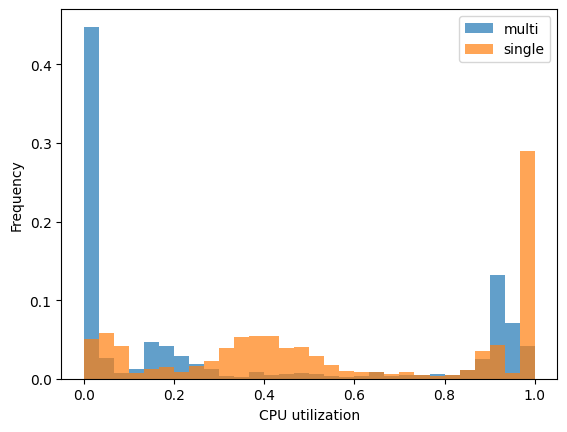

In [153]:
data = df_host_multi.cpu_utilization
plt.hist(data, weights=np.ones_like(data) / len(data),
         alpha=0.7, label="multi", bins=30)


data = df_host_single.cpu_utilization
plt.hist(data, weights=np.ones_like(data) / len(data),
         alpha=0.7, label="single", bins=30)

plt.xlabel("CPU utilization")
plt.ylabel("Frequency")
plt.legend()
plt.show()

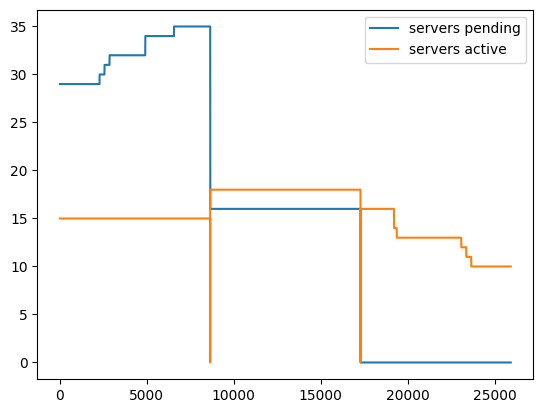

In [154]:
import matplotlib.pyplot as plt

plt.plot(df_service_single.servers_pending, label="servers pending")
plt.plot(df_service_single.servers_active, label="servers active")

plt.legend()

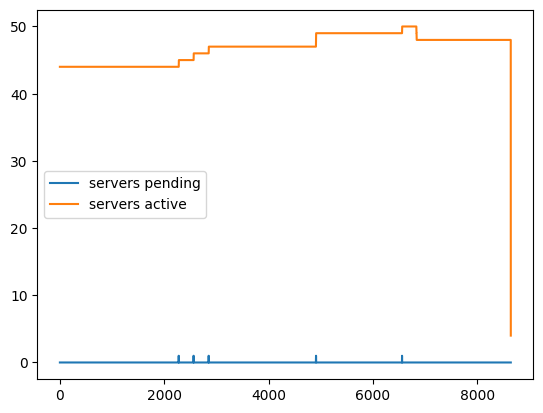

In [155]:
import matplotlib.pyplot as plt

plt.plot(df_service_multi.servers_pending, label="servers pending")
plt.plot(df_service_multi.servers_active, label="servers active")

plt.legend()

In [156]:
df_server_single.head()

,timestamp,server_id,host_id,mem_capacity,cpu_count,cpu_limit,cpu_time_active,cpu_time_idle,cpu_time_steal,cpu_time_lost,uptime,downtime,provision_time,boot_time,absolute_timestamp
0,1970-01-01 00:05:00+00:00,b'\x00\x00\x00\x00\x00\x00\x00\x00\x06\xc4]\x1...,b'\xe2 \xa89{\x1d\xcd\xaf\x00\x00\x00\x00\x00\...,181,1,25600.0,0,2624,0,0,300000,0,1970-01-01 00:00:00+00:00,1970-01-01 00:00:00+00:00,2013-08-12 13:35:46+00:00
1,1970-01-01 00:05:00+00:00,b'\x00\x00\x00\x00\x00\x00\x00\x00\x1b9\x89jQ\...,b'\xe2 \xa89{\x1d\xcd\xaf\x00\x00\x00\x00\x00\...,260,1,25600.0,0,2624,0,0,300000,0,1970-01-01 00:00:00+00:00,1970-01-01 00:00:00+00:00,2013-08-12 13:35:46+00:00
2,1970-01-01 00:05:00+00:00,"b'\x00\x00\x00\x00\x00\x00\x00\x00,\x82\x9a\xb...",b'\xe2 \xa89{\x1d\xcd\xaf\x00\x00\x00\x00\x00\...,250,1,25600.0,2,2622,0,0,300000,0,1970-01-01 00:00:00+00:00,1970-01-01 00:00:00+00:00,2013-08-12 13:35:46+00:00
3,1970-01-01 00:05:00+00:00,b'\x00\x00\x00\x00\x00\x00\x00\x00>\xe5x\x90A\...,b'\xe2 \xa89{\x1d\xcd\xaf\x00\x00\x00\x00\x00\...,125,1,25600.0,0,2624,0,0,300000,0,1970-01-01 00:00:00+00:00,1970-01-01 00:00:00+00:00,2013-08-12 13:35:46+00:00
4,1970-01-01 00:05:00+00:00,b'\x00\x00\x00\x00\x00\x00\x00\x00e~\xec\xdd<\...,b'\xe2 \xa89{\x1d\xcd\xaf\x00\x00\x00\x00\x00\...,157,1,25600.0,2,2951,0,0,300000,0,1970-01-01 00:00:00+00:00,1970-01-01 00:00:00+00:00,2013-08-12 13:35:46+00:00


In [157]:
utilization = df_host_single.cpu_utilization.to_numpy()

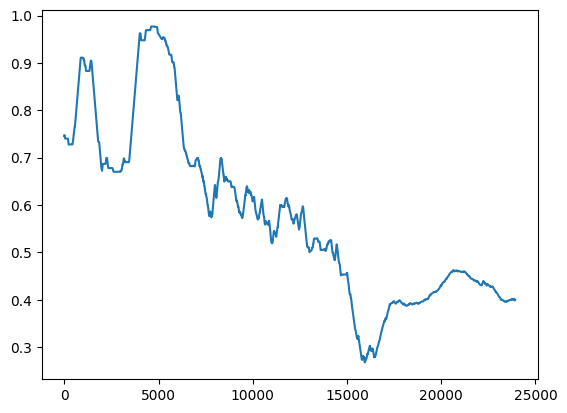

In [161]:
window = 2000
avg_utilization = []

for ind in range(len(utilization) - window + 1):
    avg_utilization.append(np.mean(utilization[ind:ind+window]))
    
plt.plot(avg_utilization)

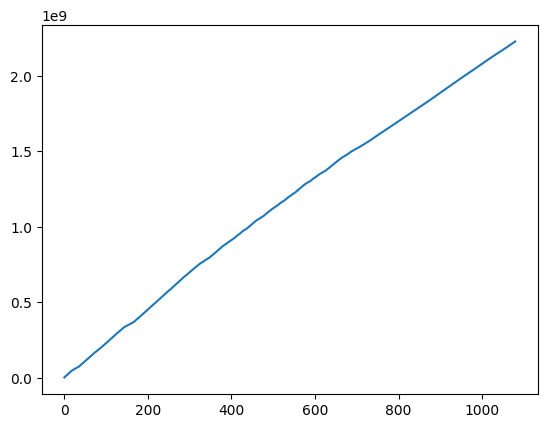

In [129]:
sum_util = []

last_util = 0
for util in utilization:
    sum_util.append(util + last_util)
    last_util = sum_util[-1]
    
plt.plot(sum_util)

In [ ]:
output_file = "../Python_scripts/meta_small.parquet"
output_file_path = Path(output_file)

df_meta_new.to_parquet(output_file_path, index=False)

output_file = "../Python_scripts/trace_small.parquet"
output_file_path = Path(output_file)
df_trace_new.to_parquet(output_file_path, index=False)